In [38]:
import numpy as np
import scipy.signal as sig
from itertools import combinations
import sys
sys.path.append('../')
from utils.metrics import fcd_ccor_eeg, fluidity, n_states_eeg
from utils.avalanches import go_avalanches
import matplotlib.pyplot as plt
import scipy.stats as st

In [39]:
ts = np.load('../data/example_ts.npy')
decim_freq = 1450/5 # Sample frequency decimated by 5

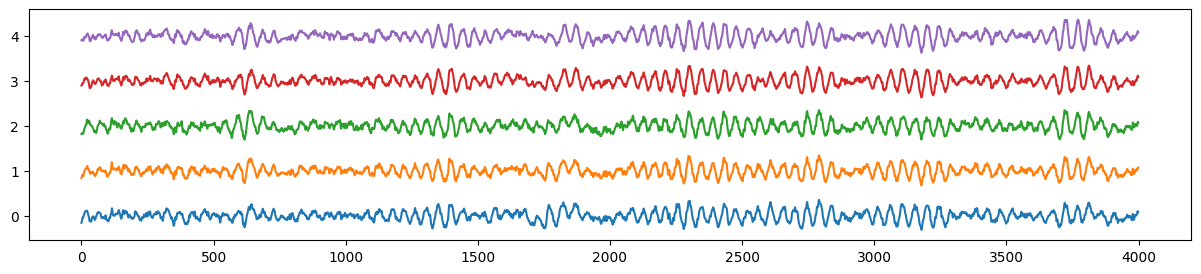

In [40]:
plt.figure(figsize=(15, 3))
plt.plot(ts[:5,:4000].T*1e4 + np.arange(5))

In [41]:
win = 3
fcd, fcs = fcd_ccor_eeg(ts, win_len=int(decim_freq*win), win_sp=int(decim_freq*win/10))

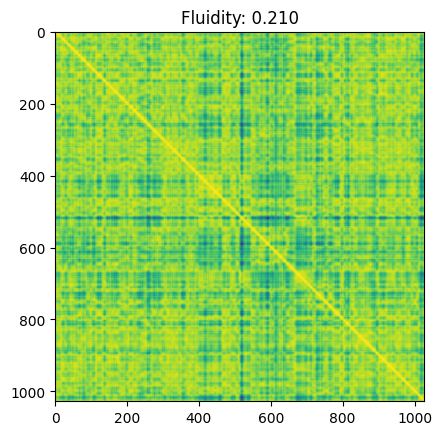

In [42]:
plt.imshow(fcd)
fl = fluidity(fcd, win_len=int(decim_freq*win), overlap=int(decim_freq*win/10))
plt.title(f'Fluidity: {fl:.3f}')
plt.show()

In [49]:
# ts is your EEG recording
avalanches = go_avalanches(ts.T, binsize=1, thre=3.) # find avalanches using the avalanches package

functional_repertoire = n_states_eeg(avalanches)

In [50]:
print("Size of the functional repertoire:", functional_repertoire)
print("Functional repertoires normalized by duration of the recording:", functional_repertoire / (ts.shape[1] / decim_freq / 60))

Size of the functional repertoire: 448
Functional repertoires normalized by duration of the recording: 86.38010704431369
